#  WeRateDogs Data Analysis Project
This project is a real-world data gathered from twitter account 'WeRateDogs'. This data is analysed using Python and its libraries, and the data is gathered from a variety of sources and in a variety of formats. The analysis will focus on assessing its quality and tidiness, then clean it. After cleaning the data, some insights will be cleared with visualizations to be easy to understand.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import requests as req
import json
import tweepy
import re
import os
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from timeit import default_timer as timer
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling
 - <b>Gathering</b> the data from 3 different sources.
     - Uploaded CSV file <b>'twitter-archive-enhanced.csv'</b>
     - TSV file downloaded from Udacity's servers and downloaded programmatically using the <b>'Requests'</b> library from the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'image-predictions.tsv'
     - Data gathered from twitter using <b>'Tweepy'</b> library
 - <b>Assessing Data
 - Cleaning Data</b>


*********************

### Gathering Data
- Downloading <b>'image-predictions.tsv'</b>.
- Importing <b>'twitter-archive-enhanced.csv'</b> and <b>'image-predictions.tsv'</b> as dataframes.
- Quering data from twitter

In [2]:
try:
    image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    image_predictions = req.get(image_predictions_url)

    with open(os.path.join(os.getcwd(), image_predictions_url.split('/')[-1]), mode='wb') as file:
        file.write(image_predictions.content)
except:
    pass

d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S +%f')

image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')
twitter_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv', parse_dates=['timestamp'], date_parser=d_parser)

#### Gathering data from 'tweet_json.txt'
- Tweets Ids
- Retweets Count
- Favorites Count (Likes)
- Retweet and Likes average for analysis

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archived_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3]:
json_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)

        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        retweet_favorite_avg = (tweet['retweet_count']+tweet['favorite_count'])
        
        json_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'retweet_favorite_sum': retweet_favorite_avg})

twitter_api_df = pd.DataFrame(json_list)

#### Making Dataframe copies

In [4]:
archived_df = twitter_enhanced_df.copy()
image_pred_df = image_predictions_df.copy()
twitter_df = twitter_api_df.copy()

*********************

## Assessing
A visual assessment is previously done before the programmatic assessment

In [5]:
archived_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
archived_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns]

In [7]:
archived_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455128e+17,2.015385e+16,7.720221e+17,1.241437e+16,13.126486,10.455433
std,6.856706e+16,7.583419e+16,1.253546e+17,6.236131e+16,9.597227e+16,45.876648,6.745237
min,6.660210e+17,6.660000e+17,1.185634e+07,6.660000e+17,7.832140e+05,0.000000,0.000000
25%,6.783992e+17,6.760000e+17,3.086374e+08,7.190000e+17,4.196984e+09,10.000000,10.000000
50%,7.196275e+17,7.035000e+17,4.196984e+09,7.800000e+17,4.196984e+09,11.000000,10.000000
75%,7.993375e+17,8.260000e+17,4.196984e+09,8.200000e+17,4.196984e+09,12.000000,10.000000
max,8.924210e+17,8.860000e+17,8.410000e+17,8.870000e+17,7.870000e+17,1776.000000,170.000000


In [8]:
sum(archived_df.duplicated())

0

In [9]:
archived_df[archived_df['text'].str.contains('only rate dogs')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
25,8.871010e+17,NaN,NaN,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
59,8.808720e+17,NaN,NaN,2017-06-30 19:35:32,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
93,8.740580e+17,NaN,NaN,2017-06-12 00:15:36,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,None,None,None,None
118,8.699890e+17,NaN,NaN,2017-05-31 18:47:24,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.590000e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
127,8.679000e+17,NaN,NaN,2017-05-26 00:29:37,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,12,10,None,None,None,None,None
131,8.670520e+17,NaN,NaN,2017-05-23 16:16:06,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None
141,8.648730e+17,NaN,NaN,2017-05-17 16:00:15,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864873206...,14,10,None,None,None,None,None
154,8.620970e+17,NaN,NaN,2017-05-10 00:08:34,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862096992...,13,10,None,None,None,None,None
169,8.591970e+17,NaN,NaN,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,8.554590e+17,NaN,NaN,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None


In [10]:
archived_df[archived_df['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,8.910880e+17,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,8.907290e+17,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,8.896650e+17,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,8.873430e+17,NaN,NaN,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,8.871010e+17,NaN,NaN,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,8.862670e+17,8.860000e+17,2.281182e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,8.860540e+17,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860000e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,8.855190e+17,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,8.851680e+17,NaN,NaN,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,8.844420e+17,NaN,NaN,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [11]:
archived_df[archived_df['name'].str.islower()]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [12]:
archived_df[archived_df['rating_denominator'] != 10]['rating_denominator'].unique()

array([  0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40, 130,
       110,  16, 120,   2])

In [13]:
archived_df[archived_df['rating_denominator'] != 10].shape

(23, 17)

#### Checking which rows has uncorrect rating denominator

In [14]:
ratings =[]
false_ratings_index = []
for i in range(len(archived_df)):
    try:
        search = re.search(r"\d{1,2}[\/b]10", archived_df['text'][i])
        ratings.append(search.group())
    except:
        ratings.append(None)
        false_ratings_index.append(i)

In [15]:
print(false_ratings_index)

[342, 433, 516, 902, 1120, 1228, 1254, 1274, 1351, 1433, 1598, 1634, 1635, 1663, 1779, 1843]


### archived_df:
### Quality Issues
#### Visual Assessing
1. </b>Not Dogs:</b>1207, 1303, 1737, 1121, 1857 
2. Dog with 'mad' value in name colums is dog but name is lowercase 682
3. Dogs names needs to be extracted from text column 1853, 1858
4. Values in text column that has the sentence <b>only rate dogs</b> are not dogs.
5. Not dog names <b>a, the, an, very, such, getting, by, just</b>
6. Index 1007 got two dogs

#### Programatic Assessing
1. Missing values in columns <b>(expanded_urls, name, puppo, pupper, doggo, floofer)</b>
2. More not dog names <b>(quite, not, one, incredibly, my, his, actually, this, unacceptable, all, old, infuriating, officially, life, light, space)</b>
    - All <b>['such', 'a', 'quite', 'not', 'one', 'incredibly', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']</b>


3. Rows with rating numerators <b>(420, 666, 182, 960, 75, 84, 24, 27, 165, 1776, 204, 50, 99, 80, 45, 60, 44, 143, 121, 26, 144, 88)</b> are not true ratings.
4. Rows with rating denominators <b>(0, 15, 70, 7, 11, 150, 170, 20, 50, 90, 80, 40, 130, 110, 16, 120, 2)</b> are not true ratings. Some of them are ratings for multidogs in one tweet, and some of them are not dogs ratings.
5. Missing valyes in the <b>rating</b> column should be droped down.
6. <b>Tweet ids are float values and not complete,</b> so they should be extracted from expanded_urls column to get the full id to be able to merge data later and convert them int int64 to be the same type in the other files.
7.	The timestamp column was not datetime type.
8. Columns rating_numerator and rating_denominator are integers and they should be float.
9.	Columns (timestamp,	expanded_urls, rating_numerator, rating_denominator, name) need to be renamed with more understandable names.


Unifying the denominators and making them a constant value '10'
Recalculating the numerator values based on the new denominators
Calculating the dog_rating value as a percentage: (new_numerator / new_denominator) *100

### Tidiness Issues
1. Columns(doggo, floofer, pupper, puppo) should be one column.
2. Unnecessary columns(in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, puppo) should be droped down.
3. Row 1007 got two ratings for two different dogs.

In [16]:
image_pred_df.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
sum(image_pred_df['tweet_id'].duplicated())

0

In [20]:
image_pred_df[image_pred_df['p1_conf']<=image_pred_df['p2_conf']]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
image_pred_df[image_pred_df['p1_conf']<=image_pred_df['p3_conf']]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### image_pred_df:
### Quality Issues 
1. Column p1 values have underscores and some of them are capitalized and the others are lowercase.
2. Confidence values can be more readbale if they are percentage.
3. Columns (jpg_url, img_num, p1, p1_conf, p1_dog) should be renamed to be more readble.


### Tidiness Issues
1. Column p1_dog indicates if it is a dog or not with highst confiedence among other algorithms, so rows with <b>False</b> should be droped down. 
2. Columns (p2, p2, p2_conf, p2_dog, p3, p3_conf	p3_dog) should be droped down because they are not important. Columns(p1, p1_conf, p1_dog) are enough with the highst confidence. 


In [22]:
twitter_df.head()

,favorite_count,retweet_count,retweet_favorite_sum,tweet_id
0,39467,8853,48320,892420643555336193
1,33819,6514,40333,892177421306343426
2,25461,4328,29789,891815181378084864
3,42908,8964,51872,891689557279858688
4,41048,9774,50822,891327558926688256


In [23]:
twitter_df.shape

(2354, 4)

In [24]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count          2354 non-null int64
retweet_count           2354 non-null int64
retweet_favorite_sum    2354 non-null int64
tweet_id                2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [25]:
twitter_df.describe()

,favorite_count,retweet_count,retweet_favorite_sum,tweet_id
count,2354.000000,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,11245.765930,7.426978e+17
std,11814.771334,5284.770364,15977.832423,6.852812e+16
min,0.000000,0.000000,23.000000,6.660209e+17
25%,1415.000000,624.500000,2550.000000,6.783975e+17
50%,3603.500000,1473.500000,5484.500000,7.194596e+17
75%,10122.250000,3652.000000,13842.500000,7.993058e+17
max,132810.000000,79515.000000,210590.000000,8.924206e+17


In [26]:
sum(twitter_df['tweet_id'].duplicated())

0

*********************

## Cleaning 'archived_df'

#### Extarcting Tweet Ids from 'expanded_urls' column

In [27]:
tweet_ids = []
for i in range(len(archived_df)):
    try:
        search = re.search(r"\d{18}", archived_df['expanded_urls'][i])
        tweet_ids.append(search.group())
    except:
        tweet_ids.append('')
archived_df['tweet_id'] = tweet_ids

In [28]:
archived_df.shape

(2356, 17)

In [29]:
sum(archived_df['tweet_id'].duplicated())

309

In [30]:
archived_df.drop_duplicates(subset=['tweet_id'], inplace=True)

In [31]:
sum(archived_df['tweet_id'].duplicated())

0

In [32]:
archived_df.shape

(2047, 17)

In [33]:
archived_df.head(24)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Reset Index

In [34]:
archived_df.reset_index(drop=True, inplace=True)

#### Extarcting numerators and denominators from 'text' column

In [35]:
numerators = []
denominators = []
for i in range(len(archived_df)):
    try:
        try:
            search = re.search(r"\d{1,2}\.\d{1,2}[\/b]10", archived_df['text'][i])
            numerators.append(search.group().split('/')[0])
            denominators.append(search.group().split('/')[1])
        except:
            search = re.search(r"\d{1,2}[\/b]10", archived_df['text'][i])
            numerators.append(search.group().split('/')[0])
            denominators.append(search.group().split('/')[1])
    except:
        search = re.search(r"\d{1,3}[\/b]\d{1,3}", archived_df['text'][i])
        numerators.append(search.group().split('/')[0])
        denominators.append(search.group().split('/')[1])

In [36]:
len(numerators)

2047

In [37]:
len(denominators)

2047

In [38]:
archived_df['rating_numerator'] = numerators
archived_df['rating_denominator'] = denominators
archived_df['rating_numerator'] = archived_df['rating_numerator'].astype('float64')
archived_df['rating_denominator'] = archived_df['rating_denominator'].astype('float64')

In [39]:
archived_df[archived_df['rating_denominator'] != 10].shape

(13, 17)

In [40]:
archived_df[archived_df['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
379,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84.0,70.0,None,None,None,None,None
448,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,None
752,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,None,None,None,None,None
934,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,this,None,None,None,None
1032,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99.0,90.0,None,None,None,None,None
1056,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,None,None,None,None,None
1074,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45.0,50.0,None,None,None,None,None
1139,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60.0,50.0,a,None,None,None,None
1210,697463031882764288,NaN,NaN,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44.0,40.0,None,None,None,None,None
1377,684225744407494656,6.840000e+17,4.196984e+09,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143.0,130.0,None,None,None,None,None


In [41]:
archived_df = archived_df[archived_df['tweet_id'] != '']

In [42]:
archived_df.shape

(2046, 17)

In [43]:
archived_df[archived_df['rating_denominator'] != 10].shape

(13, 17)

In [44]:
archived_df[archived_df['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
379,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84.0,70.0,None,None,None,None,None
448,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,None
752,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,None,None,None,None,None
934,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,this,None,None,None,None
1032,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99.0,90.0,None,None,None,None,None
1056,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,None,None,None,None,None
1074,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45.0,50.0,None,None,None,None,None
1139,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60.0,50.0,a,None,None,None,None
1210,697463031882764288,NaN,NaN,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44.0,40.0,None,None,None,None,None
1377,684225744407494656,6.840000e+17,4.196984e+09,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143.0,130.0,None,None,None,None,None


#### After visually assessing again for the above dataframe:

<table style="width:100%;">
<tr>
<th style="text-align:center; background-color:#343434; color:#f2f2f2">Rows will be Edited</th>
<th style="text-align:center; background-color:#343434; color:#f2f2f2">Rows will be Deleted</th>
</tr>

<tr>
<td style="text-align:center;">Index <b>433</b>, Will be edited becasue it is a rating for 7 dogs</td>
<td style="text-align:center;">Index <b>516</b>, Will be deleted because it is uncorrect rating</td>
</tr>

<tr>
<td style="text-align:center;">Index <b>902</b>, Will be edited becasue it is a rating for 15 dogs</td>
<td style="text-align:center;"></td>
</tr>

<tr>
<td style="text-align:center;">Index <b>1120</b>, Will be edited becasue it is a rating for 17 dogs</td>
    <td style="text-align:center;"></td>
</tr>

<tr>
<td style="text-align:center;">Index <b>1228</b>, Will be edited becasue it is a rating for 9 dogs</td>
    <td style="text-align:center;"></td>
</tr>

<tr>
<td style="text-align:center;">Index <b>1254</b>, Will be edited becasue it is a rating for 8 dogs</td>
    <td style="text-align:center;"></td>
</tr>

<tr>
<td style="text-align:center;">Index <b>1274</b>, Will be edited becasue it is a rating for 5 dogs</td>
    <td style="text-align:center;"></td>
</tr>

<tr>
<td style="text-align:center;">Index <b>1351</b>, Will be edited becasue it is a rating for 5 dogs</td>
    <td style="text-align:center;"></td>
</tr>

<tr>
<td style="text-align:center;">Index <b>1433</b>, Will be edited becasue it is a rating for 4 dogs</td>
    <td style="text-align:center;"></td>
</tr>

<tr>
<td style="text-align:center;">Index <b>1634</b>, Will be edited becasue it is a rating for 13 dogs</td>
    <td style="text-align:center;"></td>
</tr>

<tr>
<td style="text-align:center;">Index <b>1635</b>, Will be edited becasue it is a rating for 11 dogs</td>
    <td style="text-align:center;"></td>
</tr>

<tr>
<td style="text-align:center;">Index <b>1779</b>, Will be edited becasue it is a rating for 12 dogs</td>
    <td style="text-align:center;"></td>
</tr>

<tr>
<td style="text-align:center;">Index <b>1843</b>, Will be edited becasue it is a rating for 8 dogs</td>
    <td style="text-align:center;"></td>
</tr>
</table>

#### Dropping row with index 516

In [45]:
archived_df.drop(archived_df.index[516], inplace=True)
archived_df.shape

(2045, 17)

#### Reset Index

In [46]:
archived_df.reset_index(drop=True, inplace=True)

#### Editing numerators and denominators values
- Unifying the denominators and making them a constant value <b>'10'</b>
- Recalculating the numerator values based on the new denominators
- Calculating the <b>dog_rating</b> value as a percentage: <b>(new_numerator / new_denominator) *100</b>

In [47]:
new_numerators = []
new_denominators = []
for i in range(len(archived_df['rating_denominator'])):
    new_denominator = 10
    try:
        if archived_df['rating_denominator'][i] != 10:
            new_numerator = 10/archived_df['rating_denominator'][i]*archived_df['rating_numerator'][i]
            new_numerators.append(new_numerator)
            new_denominators.append(new_denominator)
        else:
            new_numerators.append(archived_df['rating_numerator'][i])
            new_denominators.append(archived_df['rating_denominator'][i])
    except:
        pass

archived_df['rating_numerator'] = new_numerators 
archived_df['rating_denominator'] = new_denominators

In [48]:
archived_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


In [49]:
archived_df['dog_rating'] = (archived_df['rating_numerator']/archived_df['rating_denominator'])*100

In [50]:
archived_df['rating_denominator'].unique()

array([ 10.])

In [51]:
archived_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,130.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,130.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,120.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,130.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,120.0


#### Dropping down non-dog rows

1. Rows that contain <b>only rate dogs</b> in the <b>text</b> column.
2. Rows that contain <b>stop sending</b> in the <b>text</b> column.
3. Rows that contain <b>without a dog</b> in the <b>text</b> column.
4. Rows with ratings under <b>70%</b> and above <b>150%</b>.

In [52]:
archived_df[(archived_df['text'].str.contains('only rate dogs'))].index

Int64Index([  24,   56,   87,  110,  117,  121,  129,  140,  172,  199,  204,
             222,  278,  339,  342,  360,  365,  427,  438,  463,  467,  624,
             634,  647,  668,  684,  702,  724,  739,  847,  859,  892,  901,
             906,  912,  917,  933,  961, 1002, 1013, 1028, 1035, 1085, 1142,
            1210, 1284, 1318, 1355, 1426, 1432, 1466, 1471, 1568, 1589, 1645],
           dtype='int64')

In [53]:
archived_df[(archived_df['text'].str.contains('stop sending'))].index

Int64Index([  83,  204,  214,  365,  467,  624,  647,  684,  795,  840,  859,
             901,  906,  912,  917,  933, 1057, 1085, 1155, 1210],
           dtype='int64')

In [54]:
archived_df[(archived_df['text'].str.contains('without a dog'))].index

Int64Index([105, 679, 759, 823, 1240, 1581], dtype='int64')

In [55]:
archived_df = archived_df[~archived_df['text'].str.contains('only rate dogs|stop sending|without a dog')]

In [56]:
archived_df.shape

(1978, 18)

#### Checking Ratings

In [57]:
archived_df.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,dog_rating
count,2.200000e+01,2.200000e+01,1.570000e+02,1.570000e+02,1978.000000,1978.0,1978.00000
mean,6.975455e+17,4.196984e+09,7.750382e+17,1.431211e+16,10.671924,10.0,106.71924
std,4.461553e+16,0.000000e+00,6.320549e+16,1.029581e+17,2.686002,0.0,26.86002
min,6.670000e+17,4.196984e+09,6.660000e+17,7.832140e+05,0.000000,10.0,0.00000
25%,6.727500e+17,4.196984e+09,7.320000e+17,4.196984e+09,10.000000,10.0,100.00000
50%,6.755000e+17,4.196984e+09,7.830000e+17,4.196984e+09,11.000000,10.0,110.00000
75%,7.002500e+17,4.196984e+09,8.250000e+17,4.196984e+09,12.000000,10.0,120.00000
max,8.560000e+17,4.196984e+09,8.870000e+17,7.870000e+17,76.000000,10.0,760.00000


In [58]:
archived_df['dog_rating'].unique()

array([ 130.        ,  120.        ,  140.        ,  135.        ,
        110.        ,  100.        ,   60.        ,  150.        ,
          0.        ,   97.5       ,   70.        ,   90.        ,
        342.85714286,   80.        ,   10.        ,   50.        ,
        112.7       ,   30.        ,   40.        ,  760.        ,
        112.6       ,   20.        ,  200.        ])

In [59]:
archived_df[archived_df['dog_rating']<= 60]['text'].index

Int64Index([ 206,  279,  523,  615,  640,  735,  828,  837,  846,  896,
            ...
            2002, 2006, 2012, 2016, 2020, 2024, 2031, 2038, 2040, 2041],
           dtype='int64', length=110)

In [60]:
archived_df[archived_df['dog_rating']> 150].index

Int64Index([447, 815, 1776], dtype='int64')

After checking the ratings, three outliers will be found <b>(340.29, 0, 760, 200)</b>, so after visually assessing agian I found that ratings <b>under 70</b> and <b>above 150</b> in <b>dog_rating</b> column, most of them are not dogs or memes and not real ratings, so they should be dropped down.

In [61]:
archived_df = archived_df[archived_df['dog_rating']> 60]

In [62]:
archived_df = archived_df[archived_df['dog_rating']<=150]

In [63]:
archived_df.shape

(1865, 18)

In [64]:
archived_df.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,dog_rating
count,2.100000e+01,2.100000e+01,1.550000e+02,1.550000e+02,1865.000000,1865.0,1865.000000
mean,6.951905e+17,4.196984e+09,7.764323e+17,1.449678e+16,10.989694,10.0,109.896944
std,4.429404e+16,0.000000e+00,6.239599e+16,1.036115e+17,1.565240,0.0,15.652399
min,6.670000e+17,4.196984e+09,6.670000e+17,7.832140e+05,7.000000,10.0,70.000000
25%,6.720000e+17,4.196984e+09,7.360000e+17,4.196984e+09,10.000000,10.0,100.000000
50%,6.750000e+17,4.196984e+09,7.830000e+17,4.196984e+09,11.000000,10.0,110.000000
75%,6.920000e+17,4.196984e+09,8.260000e+17,4.196984e+09,12.000000,10.0,120.000000
max,8.560000e+17,4.196984e+09,8.870000e+17,7.870000e+17,15.000000,10.0,150.000000


#### Reset Index

In [65]:
archived_df.reset_index(drop=True, inplace=True)

#### Extracting dog stage from 'text' column and Concating (doggo, floofer, pupper,	 puppo) columns

In [66]:
archived_df['doggo'].value_counts()

None     1789
doggo      76
Name: doggo, dtype: int64

In [67]:
archived_df['floofer'].value_counts()

None       1857
floofer       8
Name: floofer, dtype: int64

In [68]:
archived_df['pupper'].value_counts()

None      1651
pupper     214
Name: pupper, dtype: int64

In [69]:
archived_df['puppo'].value_counts()

None     1842
puppo      23
Name: puppo, dtype: int64

In [70]:
stage = []
for i in range(len(archived_df)):
    try:
        search = re.search(r"pupper|puppo|floofer|doggo", archived_df['text'][i].lower())
        if search:
            stage.append(search.group())
        else:
            stage.append('Not Specified')
    except:
        pass
archived_df['dog_stage'] = stage  

In [71]:
archived_df['dog_stage'].value_counts()

Not Specified    1519
pupper            231
doggo              79
puppo              29
floofer             7
Name: dog_stage, dtype: int64

In [72]:
archived_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,130.0,Not Specified
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,130.0,Not Specified
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,120.0,Not Specified
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,130.0,Not Specified
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,120.0,Not Specified


#### Cleaning dog names

In [73]:
archived_df[archived_df['name'].str.islower()]['name'].unique()

array(['such', 'a', 'one', 'just', 'my', 'his', 'an', 'actually', 'this',
       'all', 'the', 'by', 'officially', 'light', 'space'], dtype=object)

In [74]:
not_dog_names = archived_df[archived_df['name'].str.islower()]['name'].unique()

In [75]:
archived_df.loc[archived_df.name.isin(not_dog_names), 'name'] = 'No Name'

In [76]:
archived_df[archived_df['name'].str.islower()]['name'].unique()

array([], dtype=object)

In [77]:
archived_df.loc[archived_df.name == 'None', 'name'] = 'No Name'

In [78]:
archived_df.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,130.0,Not Specified
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,130.0,Not Specified
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,120.0,Not Specified
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,130.0,Not Specified
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,120.0,Not Specified
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,No Name,None,None,None,None,130.0,Not Specified
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,130.0,Not Specified
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,No Name,None,None,None,None,130.0,Not Specified
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,130.0,Not Specified
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,140.0,doggo


#### Checking dog names

In [79]:
archived_df.loc[archived_df.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating,dog_stage


In [80]:
archived_df.loc[archived_df.name == '']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating,dog_stage


In [81]:
archived_df.loc[archived_df.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating,dog_stage


In [82]:
archived_df['name'].unique(),archived_df['name'].nunique()

(array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'No Name', 'Jax',
        'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
        'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
        'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
        'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
        'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
        'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
        'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
        'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
        'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
        'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
        'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
        'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
        'Neptune', 'Quinn

In [83]:
archived_df['name'].value_counts()

No Name     565
Charlie      11
Lucy         10
Oliver       10
Cooper       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Daisy         7
Lola          7
Toby          7
Bo            6
Stanley       6
Koda          6
Jax           6
Bella         6
Louis         5
Leo           5
Rusty         5
Bailey        5
Oscar         5
Scout         5
Milo          5
Buddy         5
Jack          4
Duke          4
Scooter       4
Maggie        4
Gus           4
           ... 
Fabio         1
Fletcher      1
Florence      1
Bubba         1
Jazz          1
Phred         1
Kanu          1
Rover         1
Caryl         1
Erik          1
Buckley       1
Clarq         1
Flash         1
Farfle        1
Sprout        1
Wafer         1
Cecil         1
Tom           1
Dale          1
Zooey         1
Poppy         1
Darla         1
Rodney        1
Reptar        1
Loomis        1
Lenox         1
Kuyu          1
Severus       1
Cora          1
Dylan         1
Name: name, Length: 890,

#### Dropping down unnecessary columns

In [84]:
archived_df.drop(['puppo','pupper','doggo','floofer','in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','rating_numerator','rating_denominator'],axis='columns', inplace=True)

In [85]:
archived_df.head()

,tweet_id,timestamp,text,expanded_urls,name,dog_rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,130.0,Not Specified
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,130.0,Not Specified
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,120.0,Not Specified
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,130.0,Not Specified
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,120.0,Not Specified


#### Renaming Columns 

In [86]:
New_Columns = ['tweet_id','tweet_timestamp','tweet_content','tweet_url','dog_name','dog_rating','dog_stage']
archived_df.columns = New_Columns

In [87]:
archived_df.columns

Index(['tweet_id', 'tweet_timestamp', 'tweet_content', 'tweet_url', 'dog_name',
       'dog_rating', 'dog_stage'],
      dtype='object')

In [88]:
archived_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 7 columns):
tweet_id           1865 non-null object
tweet_timestamp    1865 non-null datetime64[ns]
tweet_content      1865 non-null object
tweet_url          1865 non-null object
dog_name           1865 non-null object
dog_rating         1865 non-null float64
dog_stage          1865 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 102.1+ KB


## Cleaning 'image-predictions.tsv'

#### Adding the 'dog_beer' and 'confidece_percentage' columns based on the highest algorithm confidence
- Calculating the highst algorithm confidence
- Summarize the dog beer based on <b>algorithms confidence</b> and whether or not the <b>1st prediction (p1_dog)</b> is a breed of dog

In [89]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [90]:
image_pred_df.shape

(2075, 12)

#### Only dog breed will be kept
As the all confidence of the first algorithm is higher than the others as we noticed while assessing, the dog breed results of the first algorithm will be considered as the true breed.

In [91]:
image_pred_df = image_pred_df[image_pred_df['p1_dog']!=False]

In [92]:
image_pred_df.shape

(1532, 12)

#### Clean dog beers in column 'p1'

In [93]:
image_pred_df['p1'] = image_pred_df['p1'].str.replace('_',' ').str.title()

In [94]:
image_pred_df[image_pred_df['p1'].str.islower()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Convert confidence to precentage

In [95]:
image_pred_df['p1_conf'] = image_pred_df['p1_conf'] * 100

In [96]:
image_pred_df['p1_conf'].head()

0    46.5074
1    50.6826
2    59.6461
3    40.8143
4    56.0311
Name: p1_conf, dtype: float64

#### Converting the tweet ids type

In [97]:
image_pred_df['tweet_id'] = image_pred_df['tweet_id'].astype('str')

In [98]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1532 non-null object
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 124.2+ KB


#### Dropping down unnecessary columns

In [99]:
image_pred_df.drop(['p1_dog','p2', 'p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog'],axis='columns', inplace=True)

In [100]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,46.5074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,50.6826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,59.6461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,40.8143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,56.0311


#### Renaming Columns 

In [101]:
New_Columns = ['tweet_id','dog_photos_url','photos_count','dog_breed','confidence(%)']
image_pred_df.columns = New_Columns

In [102]:
image_pred_df.columns

Index(['tweet_id', 'dog_photos_url', 'photos_count', 'dog_breed',
       'confidence(%)'],
      dtype='object')

In [103]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id          1532 non-null object
dog_photos_url    1532 non-null object
photos_count      1532 non-null int64
dog_breed         1532 non-null object
confidence(%)     1532 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 71.8+ KB


### Converting the tweet ids type in twitter_api_df

In [104]:
twitter_api_df['tweet_id'] = twitter_api_df['tweet_id'].astype('str')

In [105]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count          2354 non-null int64
retweet_count           2354 non-null int64
retweet_favorite_sum    2354 non-null int64
tweet_id                2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


*********************

## Merging all previous dataframes on 'tweet_id'

In [106]:
twitter_archive_master_df = pd.merge(left=image_pred_df, right=archived_df, left_on='tweet_id', right_on='tweet_id')

In [107]:
twitter_archive_master_df.shape

(1396, 11)

In [108]:
twitter_archive_master_df = pd.merge(left=twitter_archive_master_df, right=twitter_api_df, left_on='tweet_id', right_on='tweet_id')

*********************

## Assessing 'twitter_archive_master_df'

In [109]:
twitter_archive_master_df.head()

,tweet_id,dog_photos_url,photos_count,dog_breed,confidence(%),tweet_timestamp,tweet_content,tweet_url,dog_name,dog_rating,dog_stage,favorite_count,retweet_count,retweet_favorite_sum
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,46.5074,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,No Name,80.0,Not Specified,2535,532,3067
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,50.6826,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,No Name,70.0,Not Specified,132,48,180
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,59.6461,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,No Name,90.0,Not Specified,128,47,175
3,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,65.1137,2015-11-16 00:30:50,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,No Name,100.0,Not Specified,136,60,196
4,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,69.2517,2015-11-16 00:49:46,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,No Name,100.0,Not Specified,448,261,709


In [110]:
twitter_archive_master_df.shape

(1396, 14)

In [111]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396 entries, 0 to 1395
Data columns (total 14 columns):
tweet_id                1396 non-null object
dog_photos_url          1396 non-null object
photos_count            1396 non-null int64
dog_breed               1396 non-null object
confidence(%)           1396 non-null float64
tweet_timestamp         1396 non-null datetime64[ns]
tweet_content           1396 non-null object
tweet_url               1396 non-null object
dog_name                1396 non-null object
dog_rating              1396 non-null float64
dog_stage               1396 non-null object
favorite_count          1396 non-null int64
retweet_count           1396 non-null int64
retweet_favorite_sum    1396 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 163.6+ KB


In [112]:
twitter_archive_master_df.describe()

,photos_count,confidence(%),dog_rating,favorite_count,retweet_count,retweet_favorite_sum
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,1.220630,61.476446,110.664613,9209.492837,2769.354585,11978.847421
std,0.585393,26.145633,14.661746,12614.174056,4800.446867,17104.059460
min,1.000000,4.433340,70.000000,81.000000,16.000000,97.000000
25%,1.000000,38.831825,100.000000,2201.500000,647.750000,2885.500000
50%,1.000000,61.570950,110.000000,4440.000000,1440.000000,5882.500000
75%,1.000000,85.675250,120.000000,11652.250000,3229.750000,14990.250000
max,4.000000,99.995600,140.000000,132810.000000,79515.000000,210590.000000


In [113]:
sum(twitter_archive_master_df['tweet_id'].duplicated())

0

*********************

## Saving the merged dataframes as 'twitter_archive_master.csv'

In [114]:
twitter_archive_master_df.to_csv('twitter_archive_master.csv', index=False)

*********************

## Making Visualizations

In [115]:
twitter_archive_master_df = pd.read_csv('twitter_archive_master.csv')

In [116]:
twitter_archive_master_df.head()

,tweet_id,dog_photos_url,photos_count,dog_breed,confidence(%),tweet_timestamp,tweet_content,tweet_url,dog_name,dog_rating,dog_stage,favorite_count,retweet_count,retweet_favorite_sum
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,46.5074,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,No Name,80.0,Not Specified,2535,532,3067
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,50.6826,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,No Name,70.0,Not Specified,132,48,180
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,59.6461,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,No Name,90.0,Not Specified,128,47,175
3,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,65.1137,2015-11-16 00:30:50,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,No Name,100.0,Not Specified,136,60,196
4,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,69.2517,2015-11-16 00:49:46,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,No Name,100.0,Not Specified,448,261,709


### Relation between the dog stages and the ratings

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.]),
 <a list of 8 Text yticklabel objects>)

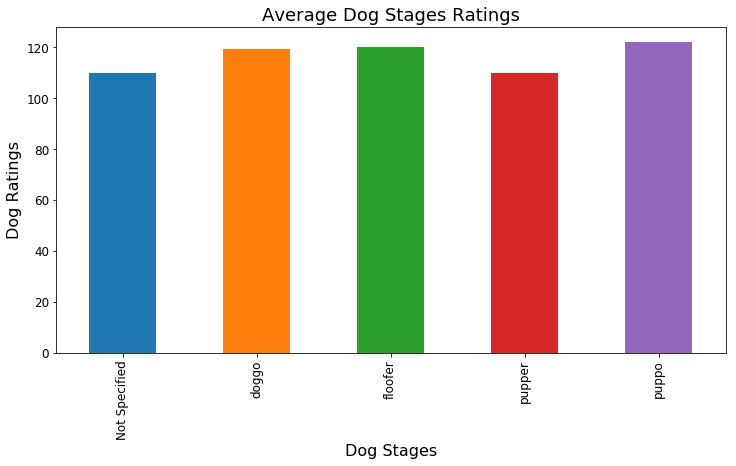

In [117]:
font_size1 = 16
font_size2 = 12

twitter_archive_master_df.groupby('dog_stage')['dog_rating'].mean().plot(kind='bar',figsize=(12,6))
plt.xlabel('Dog Stages', fontsize=font_size1)
plt.ylabel('Dog Ratings', fontsize=font_size1)
plt.title('Average Dog Stages Ratings', fontsize=font_size1+2)
plt.xticks(fontsize= font_size2)
plt.yticks(fontsize= font_size2)

In [118]:
twitter_archive_master_df.groupby('dog_stage')['dog_rating'].mean()

dog_stage
Not Specified    110.028335
doggo            119.433962
floofer          120.000000
pupper           110.093865
puppo            121.923077
Name: dog_rating, dtype: float64

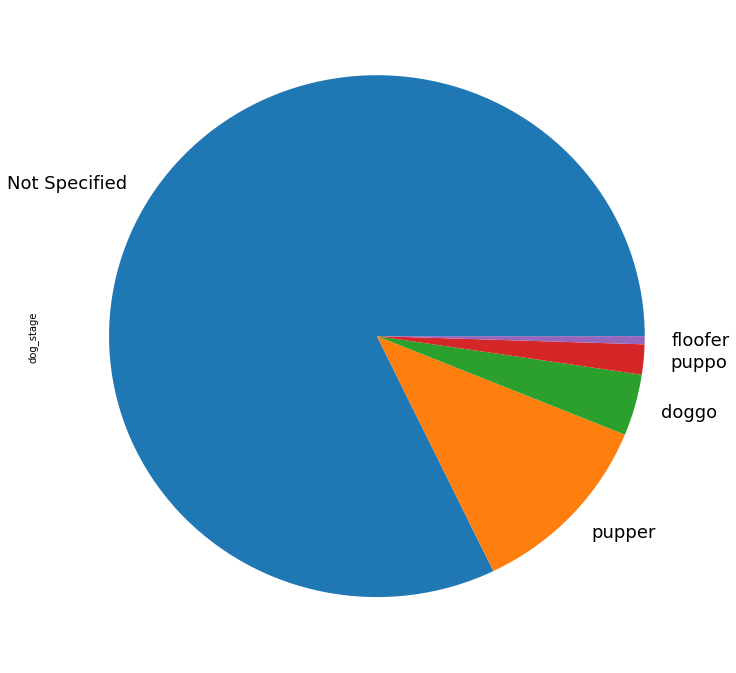

In [119]:
twitter_archive_master_df['dog_stage'].value_counts().plot(kind='pie',figsize=(12,12), fontsize=18)

The following graph shows the relationship between the ratings of dogs according to the age stage, as it shows that dogs whose age group is defined have higher ratings than others, and also shows that dogs in the puppo stage have the highest ratings. And their arrangement is as follows:

<table style="width:100%;">
<tr>
<th style="text-align:center; background-color:#343434; color:#f2f2f2">Dog Stages</th>
<th style="text-align:center; background-color:#343434; color:#f2f2f2">Average Retweets and Likes</th>
</tr>

<tr>
<td style="text-align:center;">Puppo</td>
<td style="text-align:center;">122</td>
</tr>

<tr>
<td style="text-align:center;">Floofer</td>
<td style="text-align:center;">120</td>
</tr>

<tr>
<td style="text-align:center;">Doggo</td>
<td style="text-align:center;">119</td>
</tr>

<tr>
<td style="text-align:center;">Pupper</td>
<td style="text-align:center;">110</td>
</tr>
</table>

However, most dogs have not specified their stage of age and thus we cannot rely heavily on this chart to determine which stages will receive higher ratings.

### Relation between the dog stages and the retweets and likes


(array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.]), <a list of 8 Text yticklabel objects>)

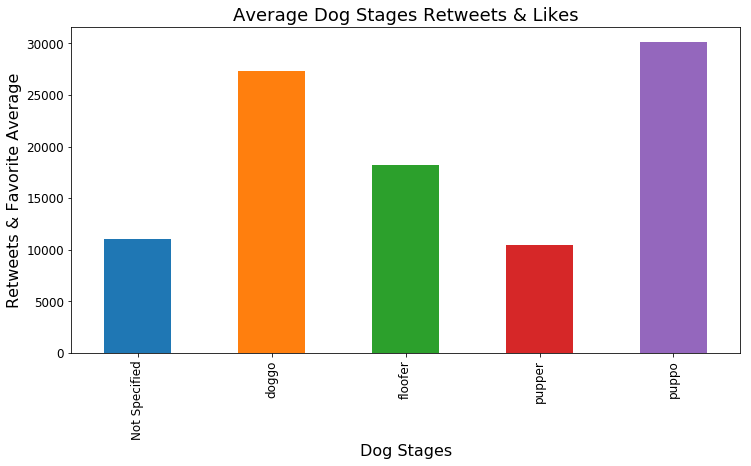

In [120]:
twitter_archive_master_df.groupby('dog_stage')['retweet_favorite_sum'].mean().plot(kind='bar',figsize=(12,6))
plt.xlabel('Dog Stages', fontsize=font_size1)
plt.ylabel('Retweets & Favorite Average', fontsize=font_size1)
plt.title('Average Dog Stages Retweets & Likes', fontsize=font_size1+2)
plt.xticks(fontsize= font_size2)
plt.yticks(fontsize= font_size2)

In [121]:
twitter_archive_master_df.groupby('dog_stage')['retweet_favorite_sum'].mean()

dog_stage
Not Specified    11038.649520
doggo            27351.000000
floofer          18174.714286
pupper           10442.460123
puppo            30084.346154
Name: retweet_favorite_sum, dtype: float64

The previous graph shows the relationship between the retweets and likes of dogs according to the age stage, as it shows that dogs whose age group is defined have higher retweets and likes than others, and also shows that dogs in the puppo stage have the highest retweets and likes. And their arrangement is as follows:

<table style="width:100%;">
<tr>
<th style="text-align:center; background-color:#343434; color:#f2f2f2">Dog Stages</th>
<th style="text-align:center; background-color:#343434; color:#f2f2f2">Average Retweets and Likes</th>
</tr>

<tr>
<td style="text-align:center;">Puppo</td>
<td style="text-align:center;">30084</td>
</tr>

<tr>
<td style="text-align:center;">Doggo</td>
<td style="text-align:center;">27351</td>
</tr>

<tr>
<td style="text-align:center;">Floofer</td>
<td style="text-align:center;">18175</td>
</tr>

<tr>
<td style="text-align:center;">Pupper</td>
<td style="text-align:center;">10442</td>
</tr>
</table>			


### Relation between the photos count of dogs and the their ratings

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.]),
 <a list of 8 Text yticklabel objects>)

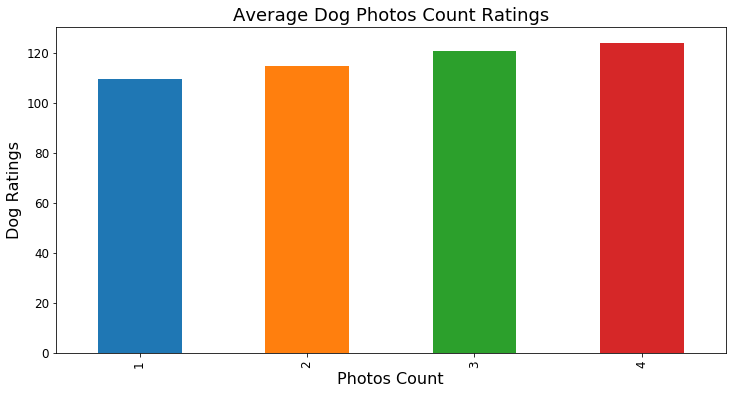

In [122]:
twitter_archive_master_df.groupby('photos_count')['dog_rating'].mean().plot(kind='bar', figsize=(12,6))
plt.xlabel('Photos Count', fontsize=font_size1)
plt.ylabel('Dog Ratings', fontsize=font_size1)
plt.title('Average Dog Photos Count Ratings', fontsize=font_size1+2)
plt.xticks(fontsize= font_size2)
plt.yticks(fontsize= font_size2)

The previous graph shows the relationship between the number of photos uploaded for the dogs according to the ratings, as it shows that dogs with more pictures have higher ratings than others.

Also, the type of media uploaded from pictures or videos will affect the rating, as I think that the media with the movement will give a better impression.

### Relation between the photos count of dogs and the retweets and likes

(array([     0.,   2500.,   5000.,   7500.,  10000.,  12500.,  15000.,
         17500.,  20000.,  22500.]), <a list of 10 Text yticklabel objects>)

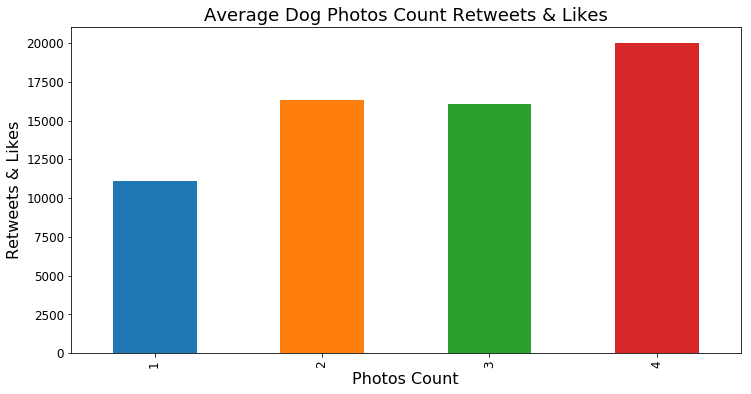

In [123]:
twitter_archive_master_df.groupby('photos_count')['retweet_favorite_sum'].mean().plot(kind='bar', figsize=(12,6))
plt.xlabel('Photos Count', fontsize=font_size1)
plt.ylabel('Retweets & Likes', fontsize=font_size1)
plt.title('Average Dog Photos Count Retweets & Likes', fontsize=font_size1+2)
plt.xticks(fontsize= font_size2)
plt.yticks(fontsize= font_size2)

The previous graph shows the relationship between the number of photos uploaded for the dogs according to the retweets and likes, as it shows that dogs with more pictures have higher retweets and likes than others.

Also, the type of media uploaded from pictures or videos will affect the retweets and likes, as I think that the media with the movement will give a better impression.

### Average Dog Breed Ratings

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.]),
 <a list of 8 Text yticklabel objects>)

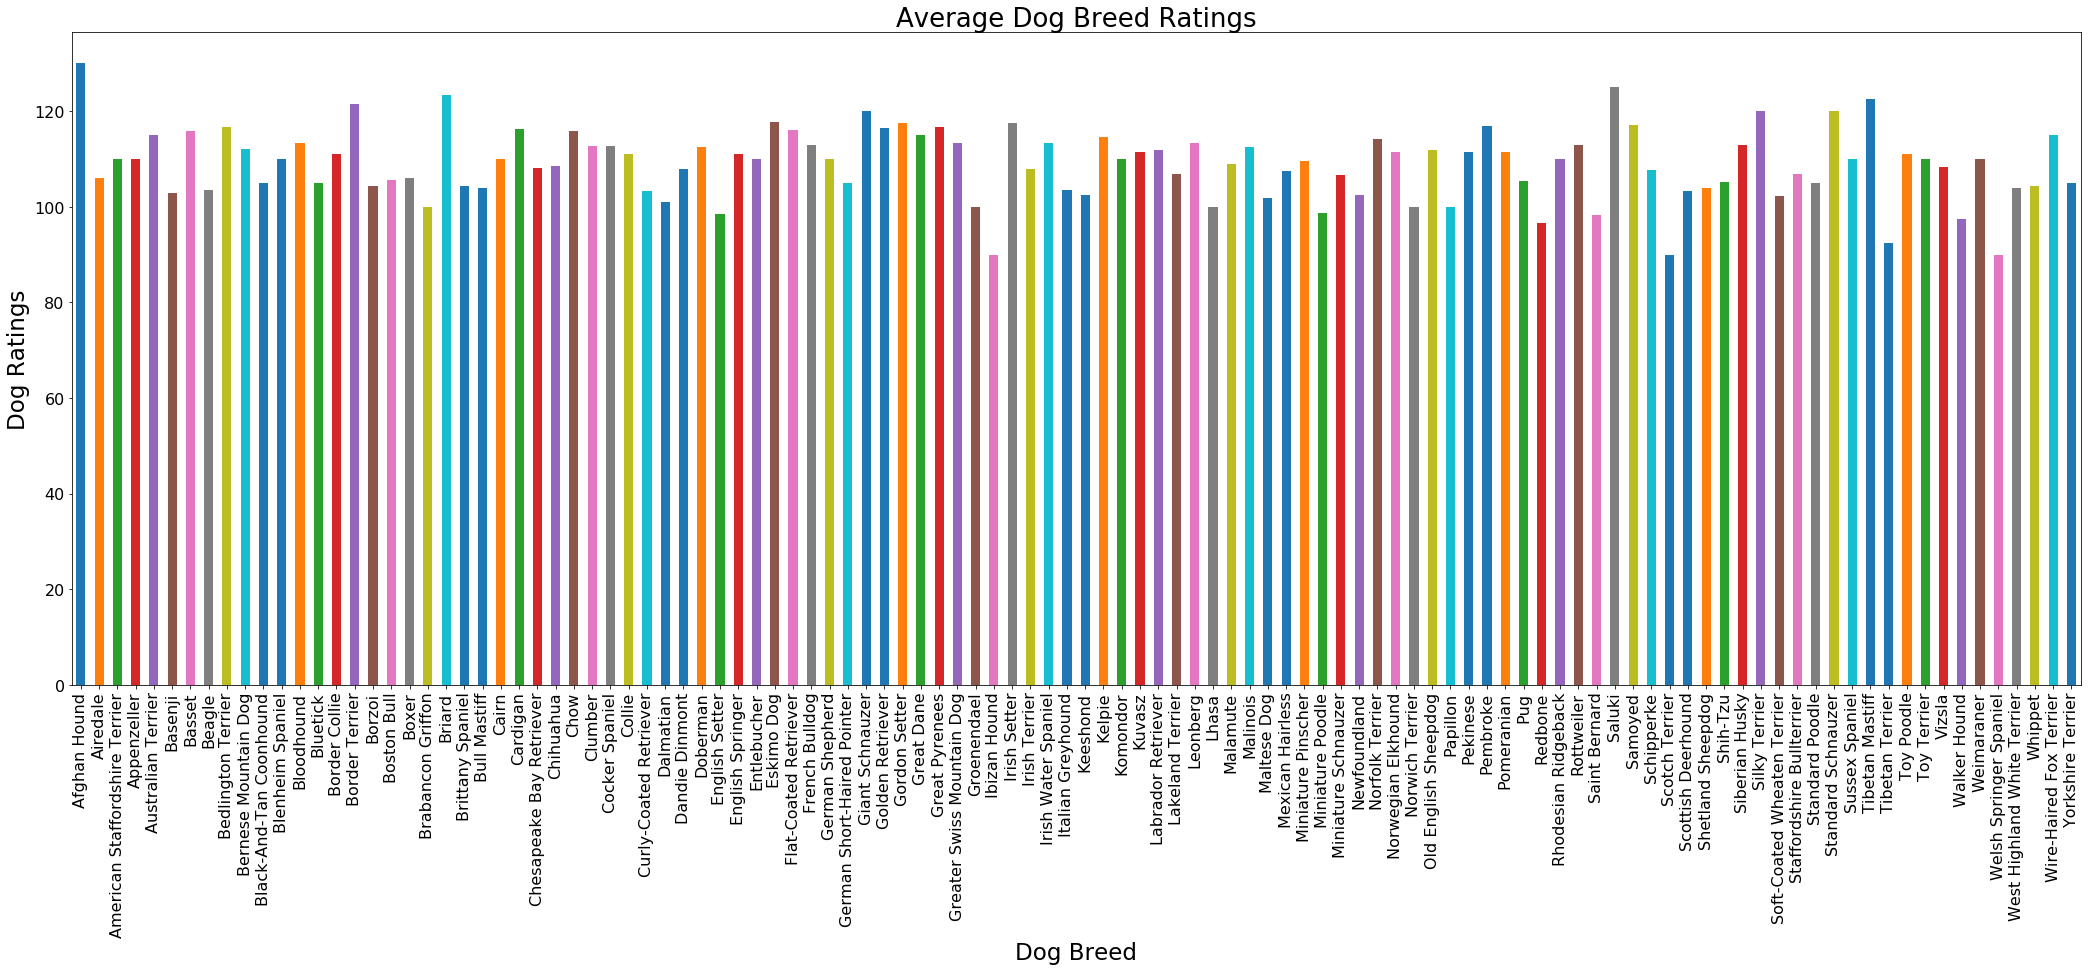

In [124]:
twitter_archive_master_df.groupby('dog_breed')['dog_rating'].mean().plot(kind='bar', figsize=(36,12))
plt.xlabel('Dog Breed', fontsize=font_size1+7)
plt.ylabel('Dog Ratings', fontsize=font_size1+7)
plt.title('Average Dog Breed Ratings', fontsize=font_size1+10)
plt.xticks(fontsize= font_size2+4)
plt.yticks(fontsize= font_size2+4)

### Average Dog Breed Retweets & Likes

(array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.]), <a list of 8 Text yticklabel objects>)

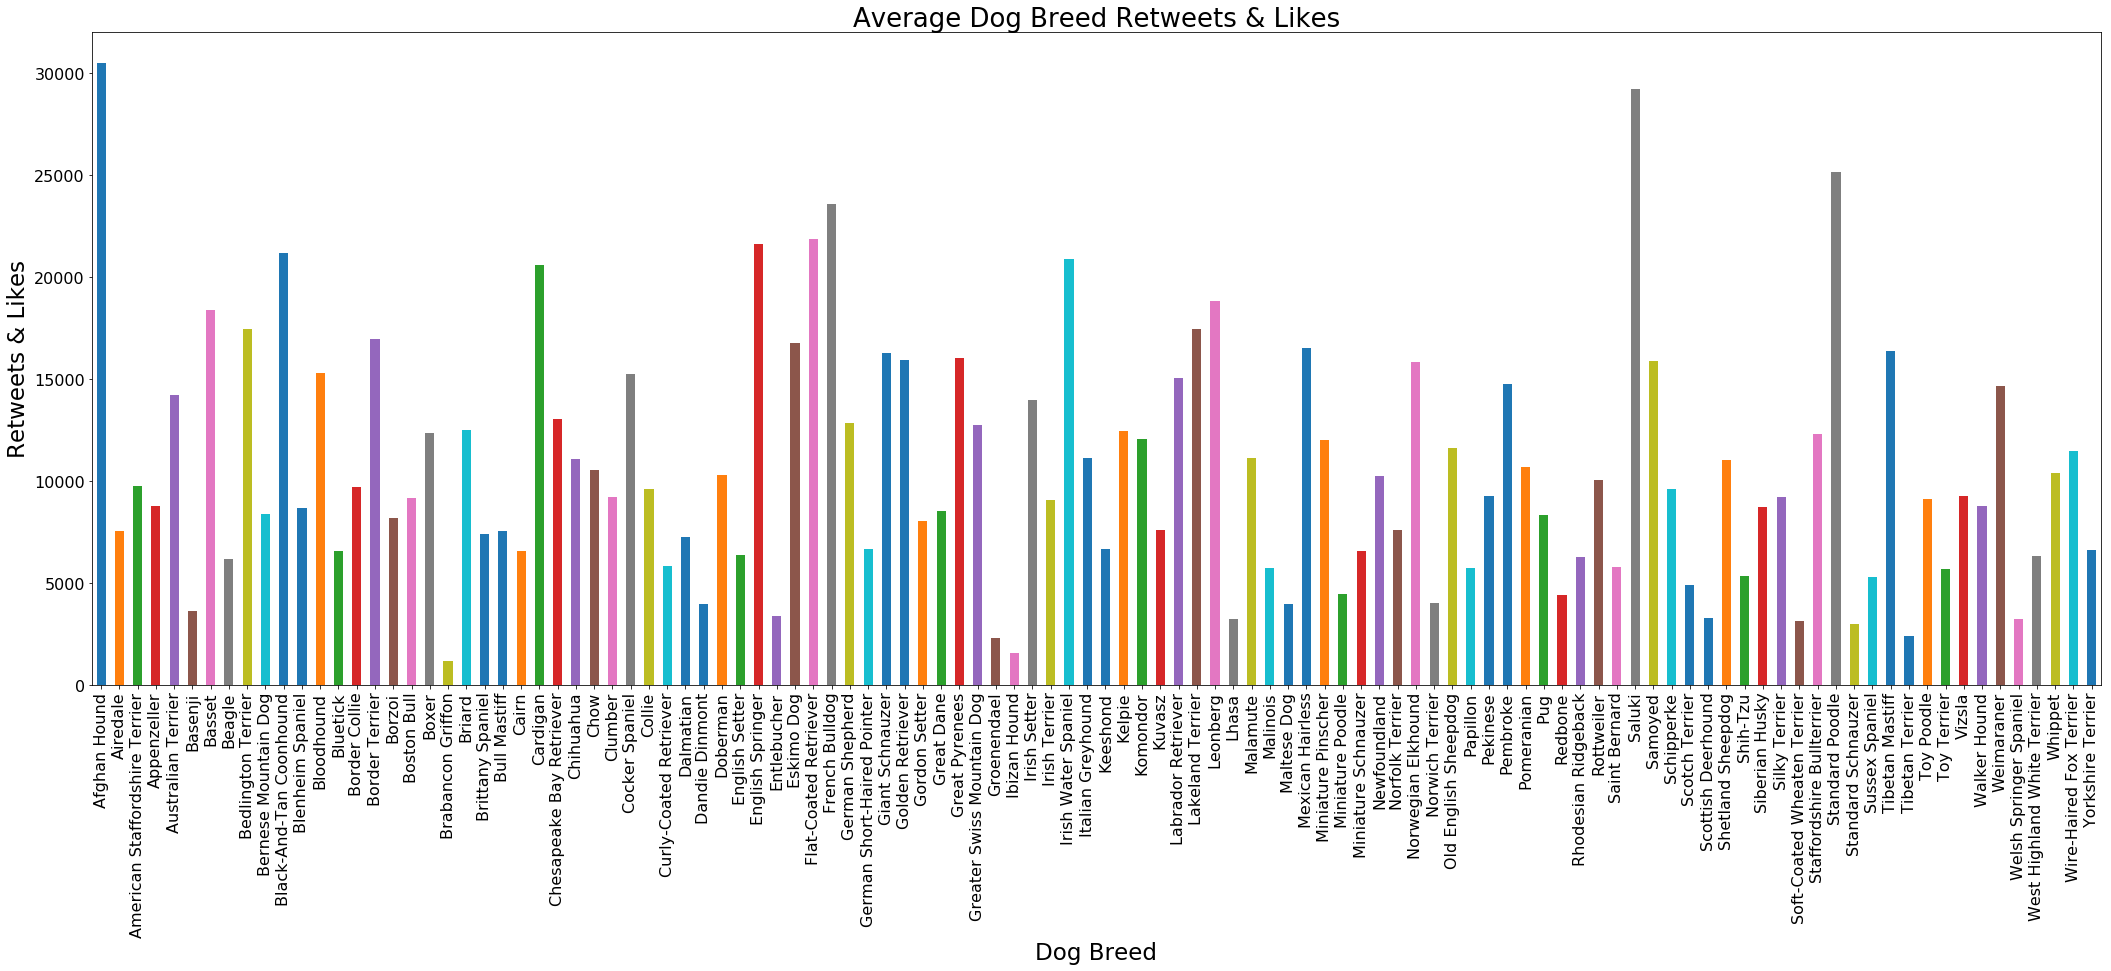

In [125]:
twitter_archive_master_df.groupby('dog_breed')['retweet_favorite_sum'].mean().plot(kind='bar', figsize=(36,12))
plt.xlabel('Dog Breed', fontsize=font_size1+7)
plt.ylabel('Retweets & Likes', fontsize=font_size1+7)
plt.title('Average Dog Breed Retweets & Likes', fontsize=font_size1+10)
plt.xticks(fontsize= font_size2+4)
plt.yticks(fontsize= font_size2+4)

### Most Common Dog Stages in Tweets

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,  180.]),
 <a list of 10 Text yticklabel objects>)

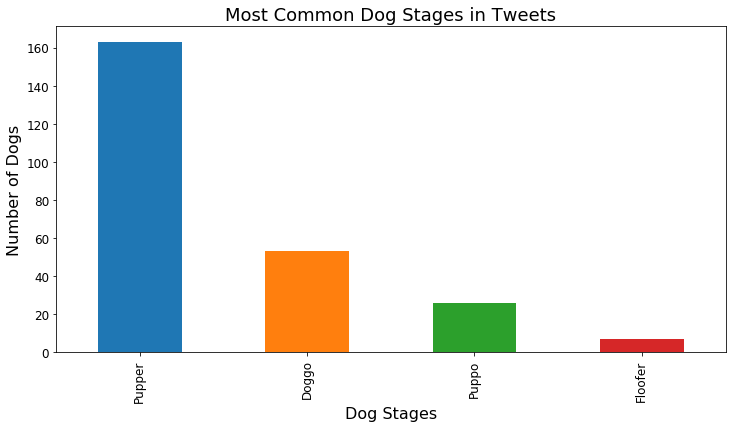

In [126]:
twitter_archive_master_df['dog_stage'].str.title().value_counts().drop('Not Specified').plot(kind='bar',figsize=(12,6))
plt.xlabel('Dog Stages', fontsize=font_size1)
plt.ylabel('Number of Dogs', fontsize=font_size1)
plt.title('Most Common Dog Stages in Tweets', fontsize=font_size1+2)
plt.xticks(fontsize= font_size2)
plt.yticks(fontsize= font_size2)

In [127]:
twitter_archive_master_df['dog_stage'].str.title().value_counts()

Not Specified    1147
Pupper            163
Doggo              53
Puppo              26
Floofer             7
Name: dog_stage, dtype: int64

The previous graph shows the number of each stage of dogs compared to the other and which of the highest stage was the most in tweets. As the most present stage was the pupper, far from the other stages, followed by the doggo stage.
But most dogs have not defined their stage, so the graph will be more accurate if their stages are known.

### Most Popular Dog Names

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text yticklabel objects>)

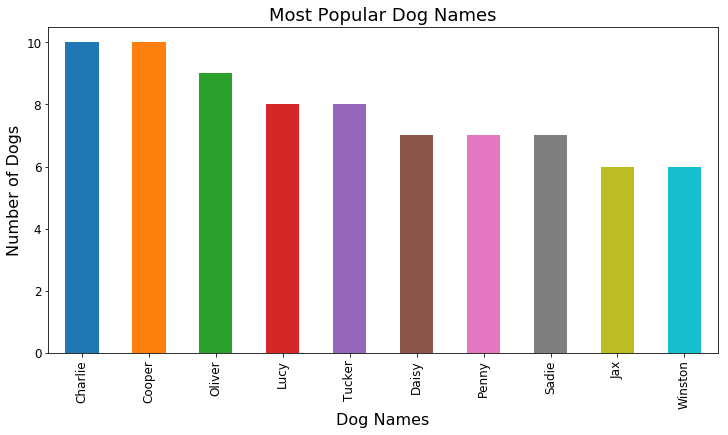

In [128]:
twitter_archive_master_df['dog_name'].value_counts().nlargest(11).drop('No Name').plot(kind='bar',figsize=(12,6))
plt.xlabel('Dog Names', fontsize=font_size1)
plt.ylabel('Number of Dogs', fontsize=font_size1)
plt.title('Most Popular Dog Names', fontsize=font_size1+2)
plt.xticks(fontsize= font_size2)
plt.yticks(fontsize= font_size2)

In [129]:
twitter_archive_master_df['dog_name'].value_counts().nlargest(11).drop('No Name')

Charlie    10
Cooper     10
Oliver      9
Lucy        8
Tucker      8
Daisy       7
Penny       7
Sadie       7
Jax         6
Winston     6
Name: dog_name, dtype: int64

This chart shows the most common dog names in tweets and what names people prefer most when naming their dogs, and these are the top 10 names and their numbers in tweets:

<table style="width:100%;">
<tr>
<th style="text-align:center; background-color:#343434; color:#f2f2f2">Dog Name</th>
<th style="text-align:center; background-color:#343434; color:#f2f2f2">Count in Tweets</th>
</tr>

<tr>
<td style="text-align:center;">Charlie</td>
<td style="text-align:center;">10</td>
</tr>

<tr>
<td style="text-align:center;">Cooper</td>
<td style="text-align:center;">10</td>
</tr>

<tr>
<td style="text-align:center;">Oliver</td>
<td style="text-align:center;">9</td>
</tr>

<tr>
<td style="text-align:center;">Tucker</td>
<td style="text-align:center;">8</td>
</tr>

<tr>
<td style="text-align:center;">Lucy</td>
<td style="text-align:center;">8</td>
</tr>

<tr>
<td style="text-align:center;">Daisy</td>
<td style="text-align:center;">7</td>
</tr>

<tr>
<td style="text-align:center;">Penny</td>
<td style="text-align:center;">7</td>
</tr>

<tr>
<td style="text-align:center;">Sadie</td>
<td style="text-align:center;">7</td>
</tr>

<tr>
<td style="text-align:center;">Jax</td>
<td style="text-align:center;">6</td>
</tr>

<tr>
<td style="text-align:center;">Koda</td>
<td style="text-align:center;">6</td>
</tr>
</table>	

### Highest 10 Dog Names Received Retweets & Likes

(array([      0.,   20000.,   40000.,   60000.,   80000.,  100000.,
         120000.,  140000.,  160000.,  180000.]),
 <a list of 10 Text yticklabel objects>)

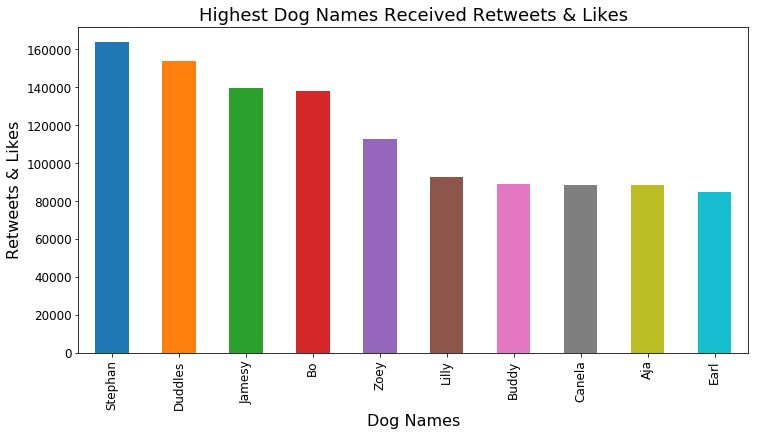

In [130]:
highest_likes_dog_name = twitter_archive_master_df[twitter_archive_master_df['retweet_favorite_sum'].isin(twitter_archive_master_df['retweet_favorite_sum'].nlargest(13))]
highest_likes_dog_name[highest_likes_dog_name['dog_name']!='No Name'][['dog_name', 'retweet_favorite_sum']].groupby('dog_name')['retweet_favorite_sum'].mean().nlargest(11).plot(kind='bar', figsize=(12,6))
plt.xlabel('Dog Names', fontsize=font_size1)
plt.ylabel('Retweets & Likes', fontsize=font_size1)
plt.title('Highest Dog Names Received Retweets & Likes', fontsize=font_size1+2)
plt.xticks(fontsize= font_size2)
plt.yticks(fontsize= font_size2)

This chart shows the most dog names had retweets and likes from the audience and what names people prefer most, and these are the top 10 names and the retweets and likes they had

### Highest 10 Ratings for Dog Names

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.]),
 <a list of 9 Text yticklabel objects>)

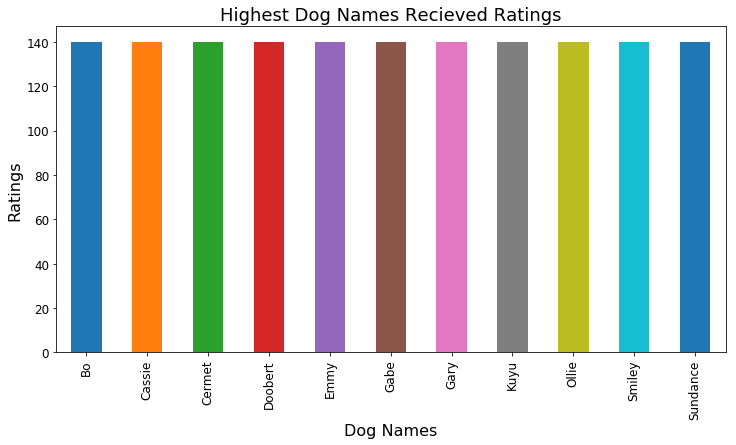

In [131]:
highest_likes_dog_name = twitter_archive_master_df[twitter_archive_master_df['dog_rating'].isin(twitter_archive_master_df['dog_rating'].nlargest(13))]
highest_likes_dog_name[highest_likes_dog_name['dog_name']!='No Name'][['dog_name', 'dog_rating']].groupby('dog_name')['dog_rating'].mean().nlargest(11).plot(kind='bar', figsize=(12,6)).plot(kind='bar', figsize=(12,6))
plt.xlabel('Dog Names', fontsize=font_size1)
plt.ylabel('Ratings', fontsize=font_size1)
plt.title('Highest Dog Names Recieved Ratings', fontsize=font_size1+2)
plt.xticks(fontsize= font_size2)
plt.yticks(fontsize= font_size2)

This chart shows the most dog names had ratings, and these are the top 10 names and the ratings they had

### Highest 10 Dog Breeds Recieved Retweets & Likes

(array([      0.,   25000.,   50000.,   75000.,  100000.,  125000.,
         150000.,  175000.,  200000.]), <a list of 9 Text yticklabel objects>)

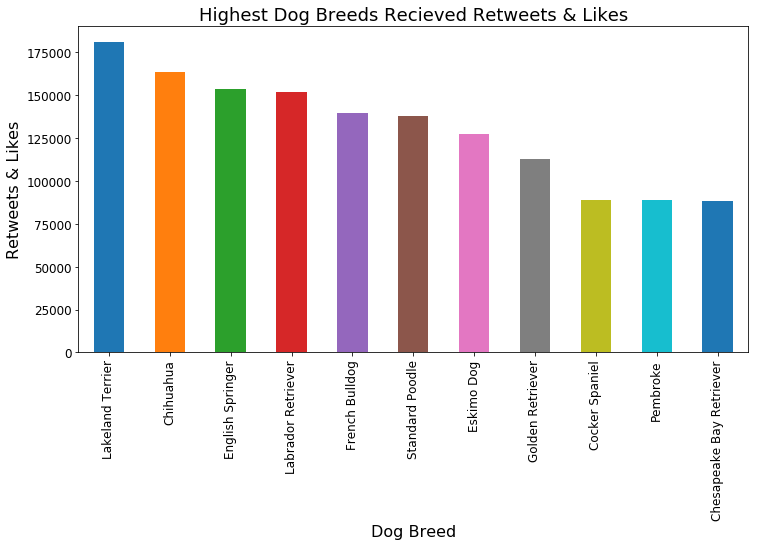

In [132]:
highest_likes_dog_name = twitter_archive_master_df[twitter_archive_master_df['retweet_favorite_sum'].isin(twitter_archive_master_df['retweet_favorite_sum'].nlargest(13))]
highest_likes_dog_name[['dog_breed', 'retweet_favorite_sum']].groupby('dog_breed')['retweet_favorite_sum'].mean().nlargest(11).plot(kind='bar', figsize=(12,6))
plt.xlabel('Dog Breed', fontsize=font_size1)
plt.ylabel('Retweets & Likes', fontsize=font_size1)
plt.title('Highest Dog Breeds Recieved Retweets & Likes', fontsize=font_size1+2)
plt.xticks(fontsize= font_size2)
plt.yticks(fontsize= font_size2)

This chart shows the most dog breeds received retweets and likes, and these are the top 10 breeds and the retweets and likes they had

### Highest 10  Retweets & Likes Averages for Dog Breeds

(array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.]), <a list of 8 Text yticklabel objects>)

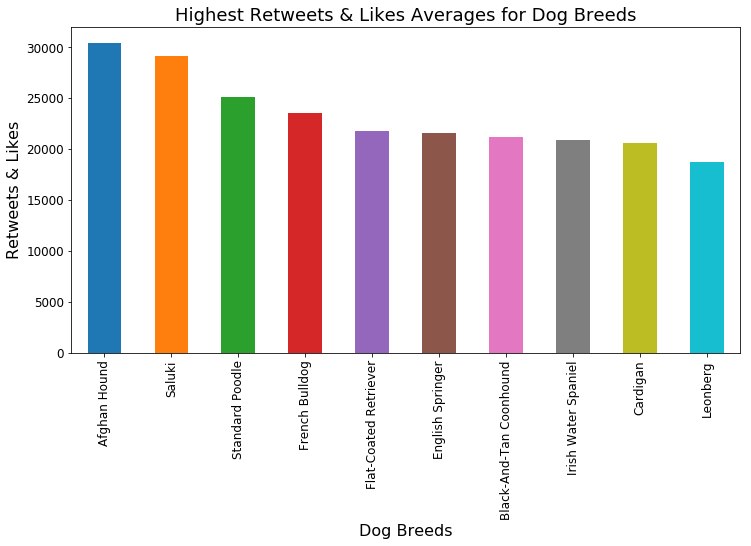

In [133]:
twitter_archive_master_df.groupby('dog_breed')['retweet_favorite_sum'].mean().nlargest(10).plot(kind='bar', figsize=(12,6))
plt.xlabel('Dog Breeds', fontsize=font_size1)
plt.ylabel('Retweets & Likes', fontsize=font_size1)
plt.title('Highest Retweets & Likes Averages for Dog Breeds', fontsize=font_size1+2)
plt.xticks(fontsize= font_size2)
plt.yticks(fontsize= font_size2)

The previous graph shows the dog breeds that people liked the most and which had the highest average likes and retweets, and those breeds were also considered the most sent breeds to the page. When comparing the two graphs, we will find that they are completely different, and the breeds that have the highest likes do not have to be people's favorites.

### Highest 10 Dog Breeds Recieved Ratings

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.]),
 <a list of 9 Text yticklabel objects>)

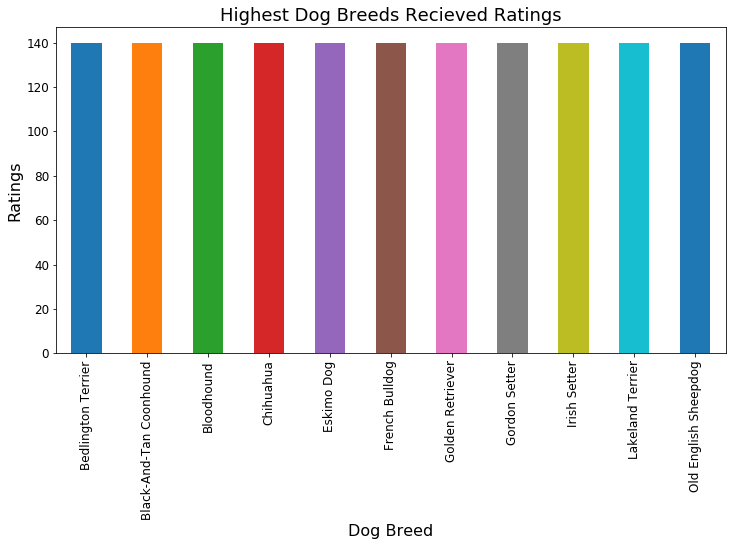

In [134]:
highest_likes_dog_name = twitter_archive_master_df[twitter_archive_master_df['dog_rating'].isin(twitter_archive_master_df['dog_rating'].nlargest(13))]
highest_likes_dog_name[['dog_breed', 'dog_rating']].groupby('dog_breed')['dog_rating'].mean().nlargest(11).plot(kind='bar', figsize=(12,6))
plt.xlabel('Dog Breed', fontsize=font_size1)
plt.ylabel('Ratings', fontsize=font_size1)
plt.title('Highest Dog Breeds Recieved Ratings', fontsize=font_size1+2)
plt.xticks(fontsize= font_size2)
plt.yticks(fontsize= font_size2)

This chart shows the highest dog breed ratings, and these are the top 10 breeds and the ratings they had

### Highest 10  Ratings Averages for Dog Breeds

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.]),
 <a list of 8 Text yticklabel objects>)

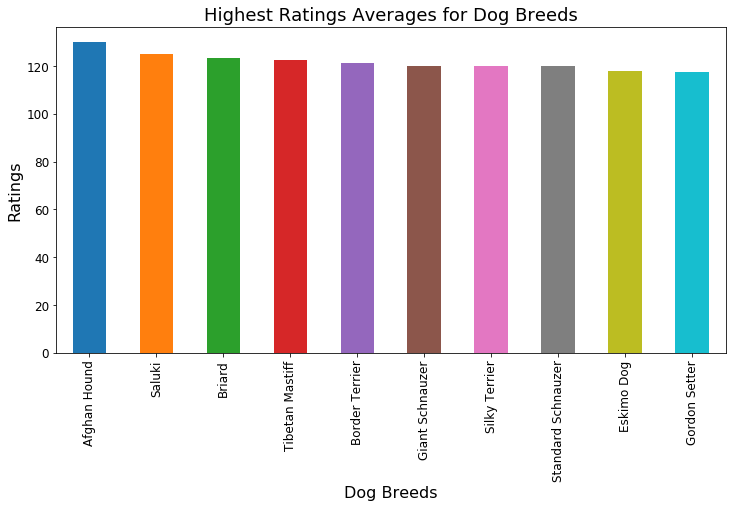

In [135]:
twitter_archive_master_df.groupby('dog_breed')['dog_rating'].mean().nlargest(10).plot(kind='bar', figsize=(12,6))
plt.xlabel('Dog Breeds', fontsize=font_size1)
plt.ylabel('Ratings', fontsize=font_size1)
plt.title('Highest Ratings Averages for Dog Breeds', fontsize=font_size1+2)
plt.xticks(fontsize= font_size2)
plt.yticks(fontsize= font_size2)

This chart shows the highest dog breed ratings averages, and these are the top 10 breeds and the ratings averages they had

**********************